In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# 1. 데이터 로드 및 전처리
data = pd.read_csv("BP_data.csv")  # 파일 이름에 맞게 경로 설정 필요
X = data.iloc[:, 2:].fillna(0).values  # 결측값 채우기
y = data.iloc[:, 1].values  # 타겟 레이블 설정

# 데이터 정규화 및 분할
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. PyTorch Dataset 생성
class BPData(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = BPData(X_train, y_train)
test_dataset = BPData(X_test, y_test)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# 3. 딥러닝 모델 설계
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),  # 첫 번째 은닉층
            nn.ReLU(),
            nn.Linear(128, 64),  # 두 번째 은닉층
            nn.ReLU(),
            nn.Linear(64, 2)  # 출력층 (2개의 클래스: 0, 1)
        )
    
    def forward(self, x):
        return self.network(x)

model = NeuralNetwork(input_dim=X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. 모델 학습
for epoch in range(30):  # 30 에포크
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

# 5. 모델 평가
model.eval()
y_pred = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        preds = model(X_batch)
        y_pred.extend(torch.argmax(preds, axis=1).tolist())

# 6. 평가지표 계산 및 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")  # 가중치 정밀도
recall = recall_score(y_test, y_pred, average="weighted")        # 가중치 재현율
f1 = f1_score(y_test, y_pred, average="weighted")                # 가중치 F1 점수

conf_matrix = confusion_matrix(y_test, y_pred)

print("Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)


Epoch 1, Loss: 0.6040
Epoch 2, Loss: 0.5128
Epoch 3, Loss: 0.4752
Epoch 4, Loss: 0.4444
Epoch 5, Loss: 0.4115
Epoch 6, Loss: 0.3789
Epoch 7, Loss: 0.3487
Epoch 8, Loss: 0.3295
Epoch 9, Loss: 0.3233
Epoch 10, Loss: 0.3035
Epoch 11, Loss: 0.2943
Epoch 12, Loss: 0.2839
Epoch 13, Loss: 0.2761
Epoch 14, Loss: 0.2712
Epoch 15, Loss: 0.2653
Epoch 16, Loss: 0.2553
Epoch 17, Loss: 0.2483
Epoch 18, Loss: 0.2445
Epoch 19, Loss: 0.2428
Epoch 20, Loss: 0.2309
Epoch 21, Loss: 0.2235
Epoch 22, Loss: 0.2207
Epoch 23, Loss: 0.2138
Epoch 24, Loss: 0.2086
Epoch 25, Loss: 0.2031
Epoch 26, Loss: 0.1944
Epoch 27, Loss: 0.1864
Epoch 28, Loss: 0.1860
Epoch 29, Loss: 0.1764
Epoch 30, Loss: 0.1633
Performance Metrics:
Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1 Score: 0.83

Confusion Matrix:
[[184  39]
 [ 30 147]]


Epoch 1, Loss: 0.1619
Epoch 2, Loss: 0.1590
Epoch 3, Loss: 0.1500
Epoch 4, Loss: 0.1446
Epoch 5, Loss: 0.1386
Epoch 6, Loss: 0.1303
Epoch 7, Loss: 0.1253
Epoch 8, Loss: 0.1188
Epoch 9, Loss: 0.1163
Epoch 10, Loss: 0.1102
Epoch 11, Loss: 0.1075
Epoch 12, Loss: 0.1033
Epoch 13, Loss: 0.0943
Epoch 14, Loss: 0.0909
Epoch 15, Loss: 0.0826
Epoch 16, Loss: 0.0798
Epoch 17, Loss: 0.0815
Epoch 18, Loss: 0.0729
Epoch 19, Loss: 0.0702
Epoch 20, Loss: 0.0674
Epoch 21, Loss: 0.0637
Epoch 22, Loss: 0.0594
Epoch 23, Loss: 0.0549
Epoch 24, Loss: 0.0528
Epoch 25, Loss: 0.0473
Epoch 26, Loss: 0.0434
Epoch 27, Loss: 0.0417
Epoch 28, Loss: 0.0402
Epoch 29, Loss: 0.0404
Epoch 30, Loss: 0.0391


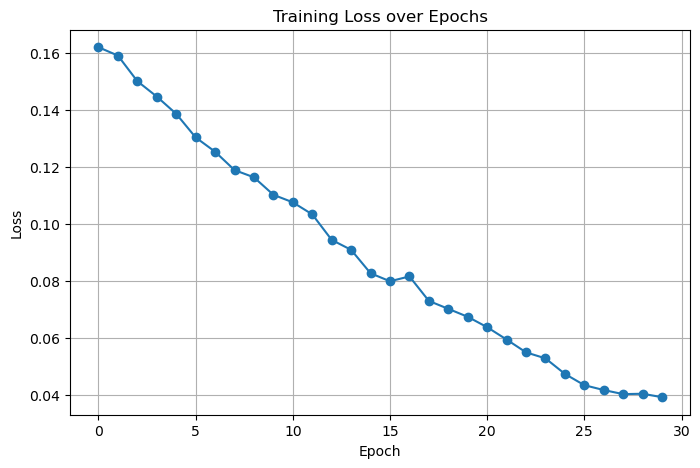

In [2]:
import matplotlib.pyplot as plt

# 손실 기록용 리스트 추가
loss_history = []

# 기존 학습 루프 수정
for epoch in range(30):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    loss_history.append(epoch_loss)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

# 손실 시각화
plt.figure(figsize=(8, 5))
plt.plot(loss_history, marker='o')
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

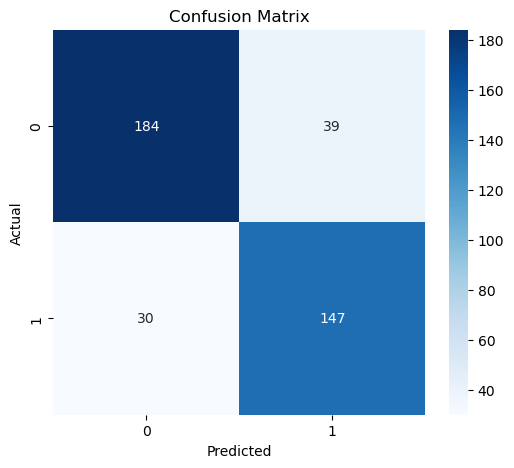

In [3]:
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


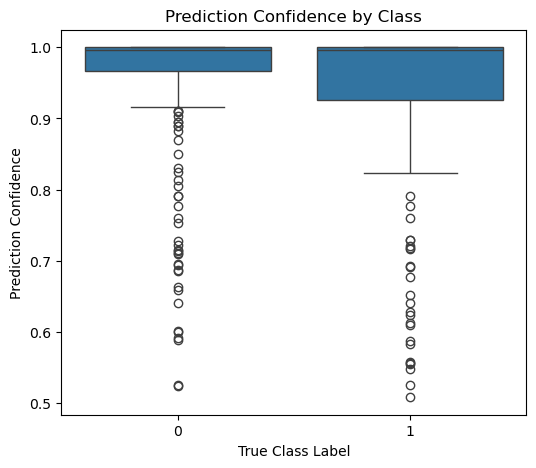

In [4]:
import numpy as np

# 확률값 추출
probs = []
true_labels = []

model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        softmax_probs = torch.softmax(outputs, dim=1)
        max_probs = torch.max(softmax_probs, dim=1)[0]  # 예측 확률 중 최대값
        probs.extend(max_probs.tolist())
        true_labels.extend(y_batch.tolist())

# Boxplot
df_plot = pd.DataFrame({
    'Confidence': probs,
    'True Label': true_labels
})

plt.figure(figsize=(6, 5))
sns.boxplot(x='True Label', y='Confidence', data=df_plot)
plt.title("Prediction Confidence by Class")
plt.xlabel("True Class Label")
plt.ylabel("Prediction Confidence")
plt.show()

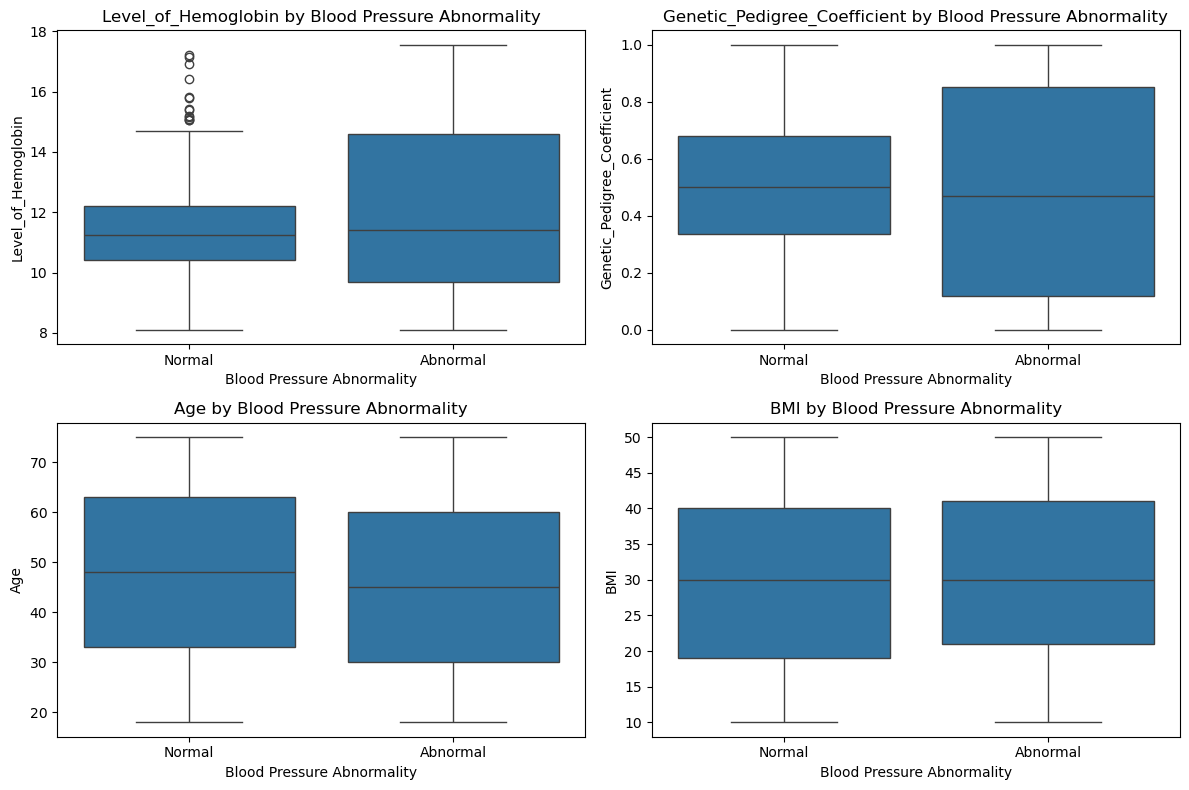

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot 그릴 변수들
numeric_cols = ['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age', 'BMI']

# 플롯 그리기
plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, x="Blood_Pressure_Abnormality", y=col)
    plt.title(f'{col} by Blood Pressure Abnormality')
    plt.xticks([0, 1], ["Normal", "Abnormal"])  # 0,1 라벨링
    plt.xlabel("Blood Pressure Abnormality")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

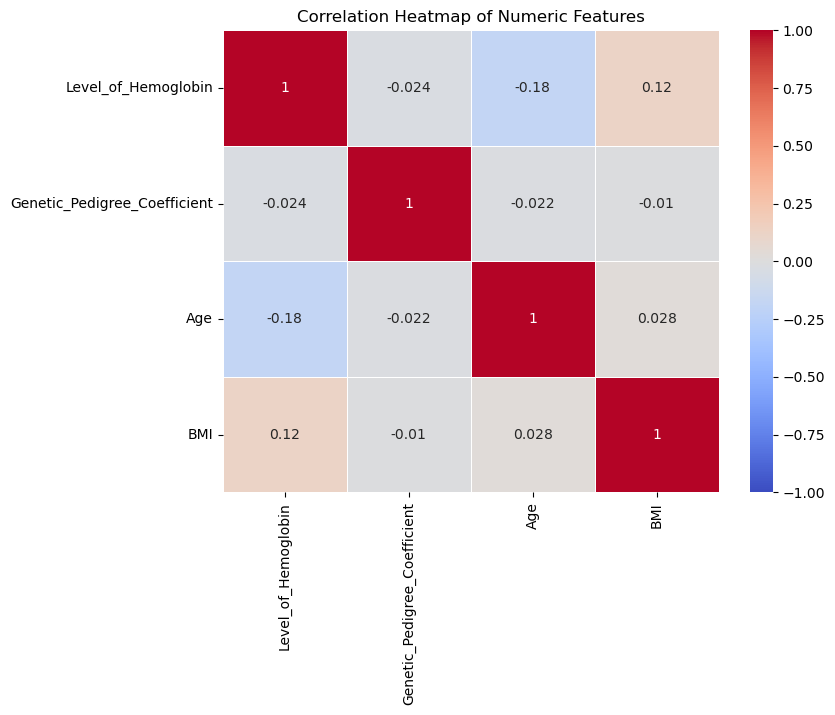

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 변수만 선택
numeric_cols = ['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age', 'BMI']
corr_matrix = data[numeric_cols].corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

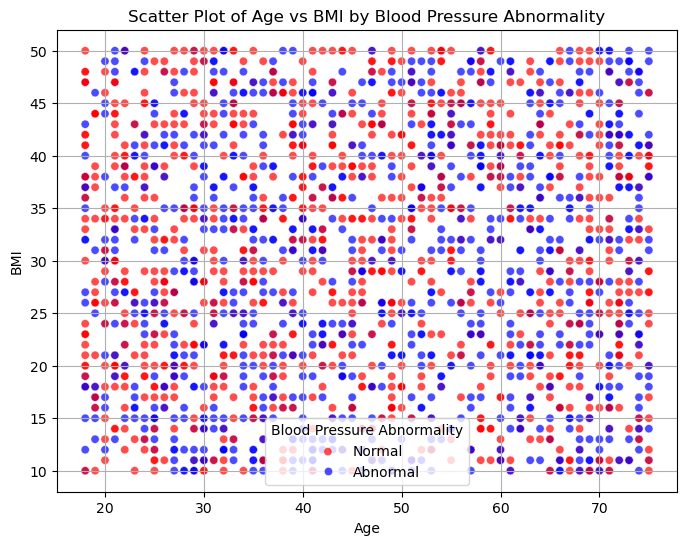

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 그리기
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=data,
    x="Age", y="BMI",
    hue="Blood_Pressure_Abnormality",
    palette={0: "blue", 1: "red"},
    alpha=0.7
)
plt.title("Scatter Plot of Age vs BMI by Blood Pressure Abnormality")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(title="Blood Pressure Abnormality", labels=["Normal", "Abnormal"])
plt.grid(True)
plt.show()


C:\Users\Minseok\AppData\Local\Temp\ipykernel_38504\2832686394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


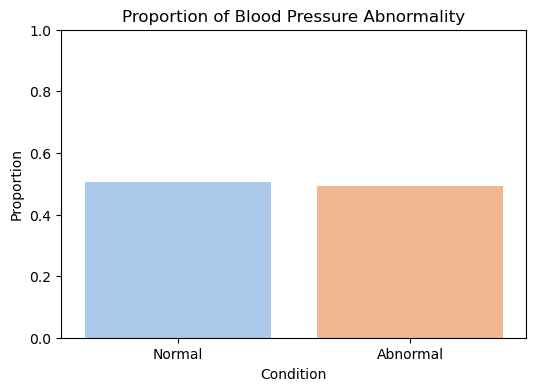

In [11]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=["Normal", "Abnormal"],
    y=data["Blood_Pressure_Abnormality"].value_counts(normalize=True).sort_index(),
    palette="pastel"
)
plt.title("Proportion of Blood Pressure Abnormality")
plt.ylabel("Proportion")
plt.xlabel("Condition")
plt.ylim(0, 1)
plt.show()


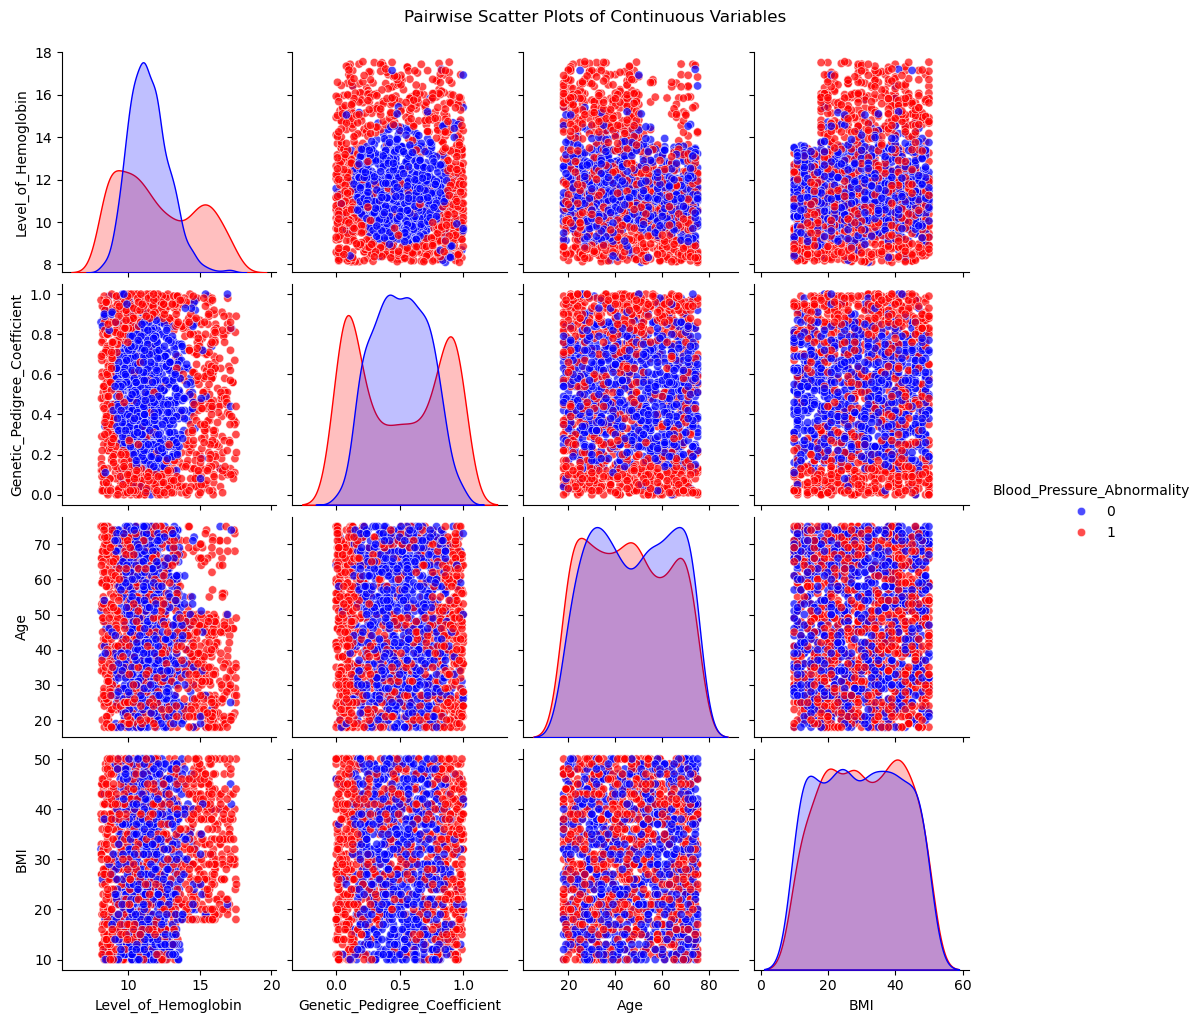

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수들만 추출
numeric_cols = ['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age', 'BMI']

# pairplot 그리기
sns.pairplot(
    data=data,
    vars=numeric_cols,
    hue="Blood_Pressure_Abnormality",  # 혈압 이상 여부에 따라 색깔 다르게
    palette={0: "blue", 1: "red"},
    diag_kind="kde",  # 대각선에는 각 변수의 KDE(분포) 곡선
    plot_kws={"alpha":0.7}
)
plt.suptitle("Pairwise Scatter Plots of Continuous Variables", y=1.02)
plt.show()


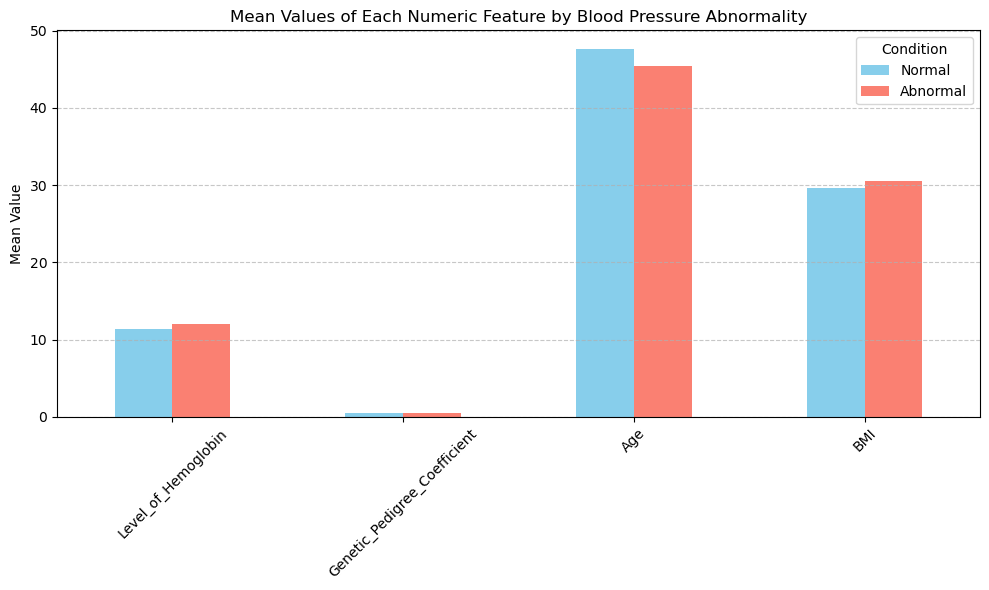

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 컬럼
numeric_cols = ['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age', 'BMI']

# Blood_Pressure_Abnormality로 그룹 나눠서 평균 계산
grouped_means = data.groupby("Blood_Pressure_Abnormality")[numeric_cols].mean()

# 막대그래프 그리기
grouped_means.T.plot(kind='bar', figsize=(10, 6), color=["skyblue", "salmon"])
plt.title("Mean Values of Each Numeric Feature by Blood Pressure Abnormality")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.legend(["Normal", "Abnormal"], title="Condition")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
